In [0]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

import pickle

In [0]:
import nltk

In [0]:
news_df = pickle.load( open( "full_news_df_new.pkl", "rb" ) )

In [0]:
news_df[:3]

,title,date,country,source,url,text,tokens,normalized_tokens
24454129,Iowans to See Rollout of New Voter ID Rules in...,18-05-02,US,Public News Service,http://www.publicnewsservice.org/2018-05-02/se...,24454129 Media outlets access enhanced multi-...,"[medium, outlet, access, enhance, multi, platf...","[[media, outlet, access, enhance, multi, platf..."
24454138,"Week of May 2, 2018",18-05-02,US,The Preston Citizen,https://www.prestoncitizen.com/news/week-of-ma...,"24454138 Week of May 2 , 2018 Quick highligh...","[week, quick, highlight, journalist, history, ...","[[week, quick, highlight, journalist, history,..."
24454140,Just a little: Small spot of land can yield lo...,18-05-02,US,Brazosport Facts,http://thefacts.com/living/article_e48f4eb0-f7...,"24454140 LAKE JACKSON -- The word "" garden "" ...","[lake, jackson, word, garden, create, sprawl, ...","[[lake, jackson], [word, garden, create, spraw..."


In [0]:
news_df.shape

(60409, 8)

In [0]:
censored_df = pickle.load( open( "censored_df.pkl", "rb" ) )

In [0]:
censored_df[:3]

,link,date,headline,source,text,tokens,normalized_tokens
0,https://theantimedia.com/mike-pompeo-wants-mid...,11-Oct-18,Mike Pompeo: The US Wants the Entire Middle Ea...,"('MEMO', 'https://www.middleeastmonitor.com/20...",b'(MEMO)\xc2\xa0\xe2\x80\x94\xc2\xa0US Secreta...,"[secretary, state, mike, pompeo, say, yesterda...","[[secretary, state, mike, pompeo, say, yesterd..."
1,https://theantimedia.com/pressure-saudi-arabia...,11-Oct-18,Trump Pressures Saudi Arabia to Explain What H...,"('MEMO', 'https://www.middleeastmonitor.com/20...",b'(MEMO)\xc2\xa0\xe2\x80\x94\xc2\xa0US Preside...,"[president, donald, trump, increase, pressure,...","[[president, donald, trump, increase, pressure..."
2,https://theantimedia.com/western-democracy-bra...,9-Oct-18,Future of Western Democracy Being Played Out i...,"('CN', 'https://consortiumnews.com/2018/10/09/...","b'Stripped to its essence, the Brazilian presi...","[strip, essence, brazilian, presidential, elec...","[[strip, essence, brazilian, presidential, ele..."


In [0]:
censored_df.shape

(790, 7)

## 1. Word phrases/Collocations/KL divergence

### Dispersion

#### News

In [0]:
#list for conspiracy token analysis
newsText_tokens = []
for i in news_df['tokens']:
    for x in i:
        newsText_tokens.append(x)


In [0]:
# create text
newsText = nltk.Text(newsText_tokens) 

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


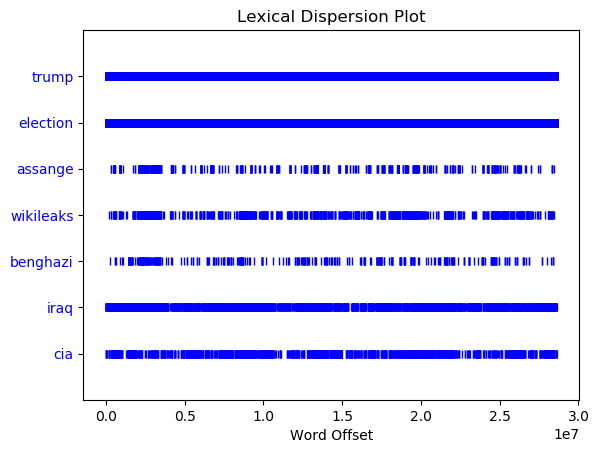

In [0]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
newsText.dispersion_plot(['trump','election', 'assange', 'wikileaks' ,'benghazi', 'iraq', 'cia'])
sns.set() #Re-enabling seaborn|

In [0]:
newsText.common_contexts(['wikileaks'])

tweet_unfold host_founder response_disclosure take_founder
question_activity year_release associate_ecuador platform_critic
mainly_create contact_founder online_plaintiff be_cnn collude_russia
channel_founder hack_publish be_philadelphia be_ubisoft emerge_begin
clinton_begin clinton_founder


In [0]:
newsText.common_contexts(['russian', 'interference'])

allegation_election investigation_election relate_election
allege_election election_troll investigate_election trump_election
investigation_intelligence election_lawyer response_election
say_election syria_foreign report_election election_meddle
election_president russia_president election_foreign election_attack
american_military campaign_election


In [0]:
newsText.common_contexts(['israel', 'interference'])

attack_political outside_vote question_say russia_america


#### Censored

In [0]:
#list for conspiracy token analysis
censoredText_tokens = []
for i in censored_df['tokens']:
    for x in i:
        censoredText_tokens.append(x)

# create text
censoredText = nltk.Text(censoredText_tokens) 

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


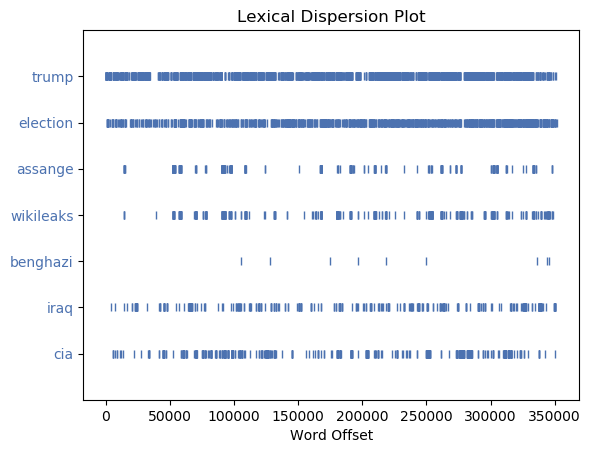

In [0]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
censoredText.dispersion_plot(['trump','election', 'assange', 'wikileaks' ,'benghazi', 'iraq', 'cia'])
sns.set() #Re-enabling seaborn|

In [0]:
# common contexts
censoredText.common_contexts(['wikileaks'])

campaign_founder epic_disclosure go_hype
pic.twitter.com/qdo0frjbpj_@wikileaks campaign_coincidence act_run
fact_publish https://t.co/qnih7gmmre_@wikileaks
https://t.co/eahawtr8rc_@wikileaks assange_empire prosecute_editor
fate_editor material_effort follow_publication previous_disclosure
focus_publication assange_conduit publish_subsequently
coincidence_document assange_numerous


In [0]:
censoredText.common_contexts(['russian', 'interference'])

allege_election


In [0]:
censoredText.common_contexts(['israel', 'interference'])

israel_u.s


### Collocations

#### News


In [0]:
# wikileaks
newsIndex = nltk.text.ConcordanceIndex(newsText) 
newsIndex.print_concordance('wikileaks')

Displaying 25 of 25 matches:
 acronym point say era trend tweet wikileaks unfold story russia effort influen
t user like specific fox news host wikileaks founder julian assange old glory u
t user like specific fox news host wikileaks founder julian assange old glory u
oppy security measure lax response wikileaks disclosure embarrass hillary clint
nterview guardian say measure take wikileaks founder justify say current ban ba
ar subsequently extradite question wikileaks activity photograph frank augstein
sange big fear extradite jail year wikileaks release ten thousand classify mili
nth fbi interview people associate wikileaks ecuador want assange london embass
cratic email anti secrecy platform wikileaks critic meet clear evidence collusi
l email late publish slowly mainly wikileaks create steady drumbeat negative pr
 trump adviser roger stone contact wikileaks founder julian assange have ask ru
social security number dump online wikileaks plaintiff democratic national comm
ow harm ema

In [0]:
# assange
newsIndex.print_concordance('assange')

Displaying 25 of 25 matches:
 news host wikileaks founder julian assange old glory unite state constitution 
 news host wikileaks founder julian assange old glory unite state constitution 
ecuadorian government action julian assange cut communication outside world dis
le manner say q&amp;a happen julian assange leave ecuadorian embassy julian ass
nge leave ecuadorian embassy julian assange ecuadorian embassy central london a
phold warrant arrest skip bail mean assange face arrest leave embassy fear subs
helpful thank feedback long support assange right asylum foreign minister march
 end set date reconnection long say assange flee ecuadorian embassy seek asylum
know ecuador surveillance operation assange say visit embassy time conscious wa
long say foreign minister primarily assange security embassy staff give interes
ecurity embassy staff give interest assange difficult work environment inside e
 say concern security communication assange leave embassy likely face prison se
p bail esti

In [0]:
# drone
newsIndex.print_concordance('cia')

Displaying 25 of 25 matches:
e president dick cheney lawsuit bring cia official valerie congress suggest ver
e president donald trump nominee lead cia descend verbal spatting praise experi
ar secretary state mike pompeo pompeo cia director replace rex tillerson exxon 
e president donald trump nominee lead cia descend verbal spatting praise experi
sinformation campaign accord director cia russian bot successful plant wild ide
nor texas state guard observe federal cia director serve director national secu
e order conceal identity claim pastor cia back network christian missionary try
r news expect iran north korea israel cia matter round trump rhetoric policy de
deal north korea threat trump nominee cia director gina haspel face potentially
 democrat haspel potential woman lead cia finish line confirmation vote referen
 ad promote gina haspel trump nominee cia director urge resident manchin suppor
el wo reinstate enhance interrogation cia director nominee gina haspel face sen
bc alex joh

#### Censored

In [0]:
# censored
censoredIndex = nltk.text.ConcordanceIndex(censoredText) 

censoredIndex.print_concordance('wikileaks')

Displaying 25 of 25 matches:
ck whistleblower guardian campaign wikileaks founder julian assange disturb ass
ulian assange disturb assange epic wikileaks disclosure bring fame journalism p
nslaught kind rarely know penny go wikileaks hype guardian book lead lucrative 
i1gaedm pic.twitter.com/qdo0frjbpj wikileaks @wikileaks august chill line entir
rease establishment smear campaign wikileaks coincidence plan campaign remove a
ion orwellian dystopia patriot act wikileaks run anti semitic alt right troll l
 easily prove fabrication e.g fact wikileaks publish ecuadorian intelligence do
igence doc https://t.co/qnih7gmmre wikileaks @wikileaks july uk state tv john s
 newsnight https://t.co/eahawtr8rc wikileaks @wikileaks july say control narrat
itimize persecution julian assange wikileaks empire hate assange punch hole abi
long stand effort arrest prosecute wikileaks editor julian assange change strat
press independent outlet note fate wikileaks editor chief julian assange legal 
seek nail a

In [0]:
censoredIndex.print_concordance('assange')

Displaying 25 of 25 matches:
n campaign wikileaks founder julian assange disturb assange epic wikileaks disc
eaks founder julian assange disturb assange epic wikileaks disclosure bring fam
g david leigh gratuitously describe assange damage personality callous disclose
ital file contain u.s embassy cable assange trap ecuadorean embassy harding sta
n columnist suzanne moore write bet assange stuff flatten guinea pig massive tu
cribe feminist late complain attack assange suffer vile abuse edwards cromwell 
embassy smell like half year julian assange move slow wit viciousness appear ne
eness jealousy perverse recognition assange achieve journalistic first sniper c
ypo cj opinion attempt evict julian assange ecuadorian embassy london aggressiv
ks coincidence plan campaign remove assange political asylum greatly escalate s
ear campaign destroy public support assange occur time assange cut world intern
y public support assange occur time assange cut world internet phone call visit
list suzie 

In [0]:
censoredIndex.print_concordance('cia')

Displaying 25 of 25 matches:
ration server power mri machine drone cia army accomplish tiny microchip big gr
 find department defense datum center cia drone operation onboard network navy 
ligence contractor receive investment cia back venture fund like company elemen
rnment use torture form ill treatment cia detention program declassify public f
d serve u.s ambassador un mike pompeo cia director advocate bomb iran serve sec
ction bully iran trade partner covert cia drive regime change operation ultimat
lican committee chairman ray mcgovern cia analyst year co found veteran intelli
emocracy ned cold war enterprise back cia director william casey jacobin 3/7/18
stand come u.s admit decade late role cia coup iran chile time come admission u
licans cheer president democrat cheer cia fbi platoon covert john mccains alleg
revoke security clearance early month cia chief john brennan get chance spew ha
nd death devastation year war 30-year cia veteran bruce riedel say unite state 
onal intell

In [0]:
# look out for words 
# "cia 's drone operation" 
# counterintelligence
# coup
# detention

### KL divergence

#### Dataset overlaps

In [0]:
newsWords = set(news_df['tokens'].sum())
censoredWords = set(censored_df['tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = newsWords | censoredWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}


In [0]:
overlapWordsDict['drone']

98988

In [0]:
overlapWordsDict['assange']

51609

In [0]:
overlapWordsDict['russia']

125655

In [0]:
overlapWordsDict['propaganda']

16893

The Notebook only wants words that appear in both:

    - Now we need to compare the two collection of words, remove those not found in both, and assign the remaining ones indices.

In [0]:
# make arrays

def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

newsProbArray = makeProbsArray(news_df['tokens'], overlapWordsDict)
censoredProbArray = makeProbsArray(censored_df['tokens'], overlapWordsDict)


In [0]:
news_censoredDivergence = scipy.stats.entropy(newsProbArray, censoredProbArray)
print (news_censoredDivergence)
censored_newsDivergence = scipy.stats.entropy(censoredProbArray, newsProbArray)
print (censored_newsDivergence)

inf
inf


Then, we can do the elementwise calculation and see which words best distinguish the two corpora.

In [0]:
news_censoredDivergence_ew = scipy.special.kl_div(newsProbArray, censoredProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = news_censoredDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,keady,inf
1,kieliszewski,inf
2,pic.twitter.com/afwyrazost,0.000003
3,loxton,inf
4,supersound,inf
5,paroi,inf
6,hosack,inf
7,krooth,inf
8,sneakily,0.000002
9,50-vote,inf


In [0]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
0,keady,inf
171395,powellite,inf
171397,flimby,inf
171398,tatreau,inf
171399,schumacher/,inf
171400,abbookness,inf
171401,umfolozi,inf
171403,netscape,inf
171404,movieriz,inf
171405,gnrt,inf


## 2. Topic modeling

In [0]:
from gensim import corpora, models

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamulticore.workers(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=8)
        model_list.append(model)
        coherence_model = models.coherencemodel.CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

#### News


In [0]:
newsTokens = news_df['tokens']

# Build bigram and trigram models after get_lemmas to see if there's anything relevant
news_bigram = models.Phrases(newsTokens, min_count=5)

# export trained model to use less memory:
bigram_mod = models.phrases.Phraser(news_bigram)

In [0]:
# turning into bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# make bigrams
newsTokens = make_bigrams(newsTokens)

In [0]:
# Pre-processing
dictionary = corpora.Dictionary([i for i in newsTokens])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
bow_corpus = [dictionary.doc2bow(text) for text in newsTokens]

In [0]:
gensim.corpora.MmCorpus.serialize('news.mm', bow_corpus)
newsmm = corpora.MmCorpus('news.mm')

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=8)
        model_list.append(model)
        coherence_model = models.coherencemodel.CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

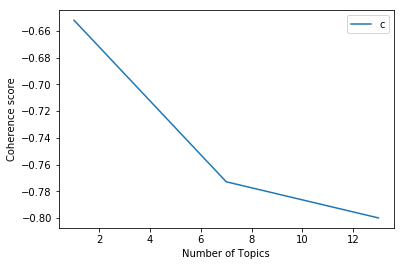

In [0]:
# Calculate and plot optimal number of topics - coherence score
model_list, coherence_values = compute_coerence_values(dictionary=dictionary, corpus=newsmm, texts=newsTokens, start=1, limit=15, step=6)
plt.plot(range(1, 15, 6), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

In [0]:
# LDA Topic modelling - 10
news_ldamodel = models.ldamodel.LdaModel(corpus=newsmm, id2word=dictionary, num_topics=10, 
                                         alpha='auto', eta='auto')



In [0]:
news_ldamodel.save('news.model')

In [0]:

news_ldamodel = gensim.models.ldamodel.LdaModel.load('news.model')

In [0]:
# show topics
news_topics = news_ldamodel.print_topics(num_words=20)

# Printing topics in 
for topic in news_topics:
    print(topic)

(0, '0.039*"trump" + 0.014*"say" + 0.014*"vote" + 0.012*"election" + 0.012*"president" + 0.012*"democrat" + 0.008*"republicans" + 0.008*"win" + 0.007*"voter" + 0.007*"campaign" + 0.007*"republican" + 0.007*"party" + 0.007*"percent" + 0.006*"donald_trump" + 0.006*"candidate" + 0.005*"clinton" + 0.005*"obama" + 0.005*"state" + 0.004*"poll" + 0.004*"time"')
(1, '0.011*"company" + 0.010*"$" + 0.009*"market" + 0.009*"year" + 0.006*"percent" + 0.006*"say" + 0.006*"business" + 0.006*"high" + 0.005*"u.s" + 0.005*"share" + 0.005*"time" + 0.005*"new" + 0.005*"trade" + 0.004*"price" + 0.004*"stock" + 0.004*"investor" + 0.003*"increase" + 0.003*"expect" + 0.003*"rate" + 0.003*"report"')
(2, '0.007*"new" + 0.005*"facebook" + 0.005*"work" + 0.004*"include" + 0.004*"say" + 0.004*"time" + 0.004*"year" + 0.004*"use" + 0.003*"company" + 0.003*"world" + 0.003*"user" + 0.003*"datum" + 0.003*"site" + 0.003*"information" + 0.003*"study" + 0.003*"find" + 0.003*"art" + 0.002*"like" + 0.002*"create" + 0.002*"t

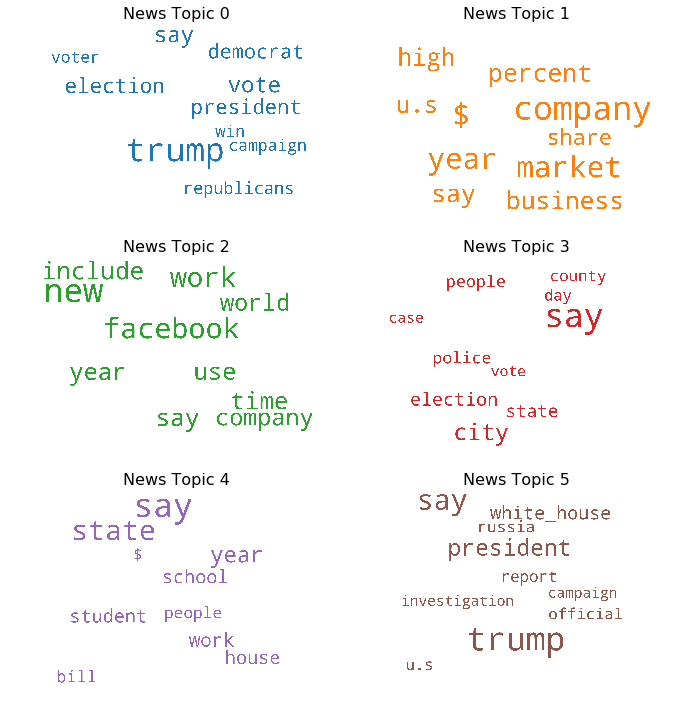

In [0]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = news_ldamodel.show_topics(formatted=False)


fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


#### For 7 topics

In [0]:
# LDA Topic modelling number of topics, 7
news_ldamodel = models.ldamodel.LdaModel(corpus=newsmm, id2word=dictionary, num_topics=7, 
                                         alpha='auto', eta='auto')

In [0]:
news_ldamodel.save('news7.model')

In [0]:
news_ldamodel_7 = gensim.models.ldamodel.LdaModel.load('news7.model')

In [0]:
# show topics
news_topics = news_ldamodel.print_topics(num_words=20)

# Printing topics in hip hop df
for topic in news_topics:
    print(topic)

(0, '0.022*"say" + 0.013*"state" + 0.011*"vote" + 0.009*"election" + 0.006*"democrat" + 0.006*"year" + 0.005*"voter" + 0.005*"people" + 0.004*"house" + 0.004*"republican" + 0.004*"candidate" + 0.004*"republicans" + 0.004*"percent" + 0.004*"party" + 0.003*"law" + 0.003*"win" + 0.003*"support" + 0.003*"office" + 0.003*"work" + 0.003*"time"')
(1, '0.013*"game" + 0.013*"team" + 0.011*"year" + 0.009*"play" + 0.009*"season" + 0.008*"say" + 0.008*"player" + 0.007*"time" + 0.007*"win" + 0.005*"well" + 0.005*"go" + 0.004*"get" + 0.004*"coach" + 0.004*"come" + 0.004*"big" + 0.004*"run" + 0.004*"state" + 0.003*"point" + 0.003*"start" + 0.003*"think"')
(2, '0.004*"new" + 0.004*"company" + 0.004*"study" + 0.004*"datum" + 0.004*"share" + 0.004*"use" + 0.004*"include" + 0.003*"time" + 0.003*"information" + 0.003*"say" + 0.003*"system" + 0.003*"result" + 0.003*"report" + 0.003*"research" + 0.003*"year" + 0.003*"provide" + 0.003*"find" + 0.003*"work" + 0.002*"technology" + 0.002*"base"')
(3, '0.009*"sa

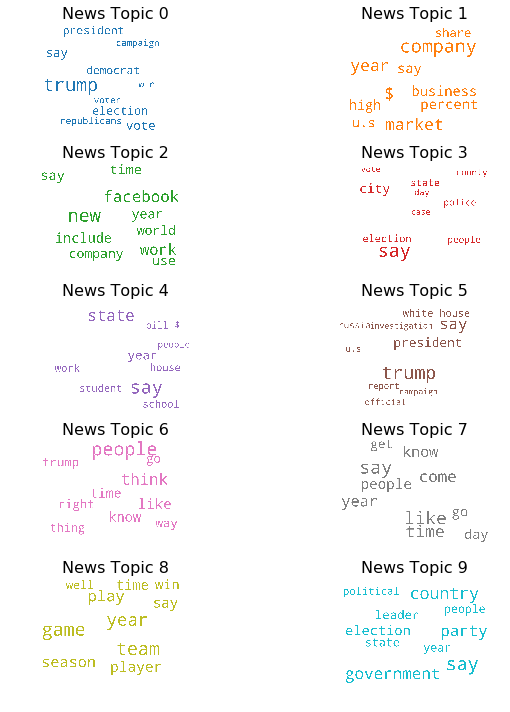

In [0]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = news_ldamodel.show_topics(formatted=False)


fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


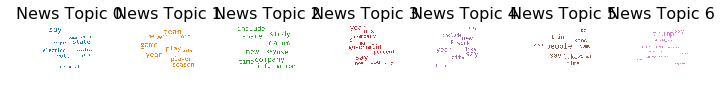

In [0]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = news_ldamodel_7.show_topics(formatted=False)


fig, axes = plt.subplots(1, 7, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [0]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(news_ldamodel, newsmm, dictionary=dictionary)
vis


In [0]:
## bonus, topic participation over time....

def fill_topic_weights(df_row, bow_corpus):
    try:
        for i in news_ldamodel[bow_corpus[df_row.name]]:
            df_row[str(i[0])] = i[1]
    except:
        return df_row
    return df_row

In [0]:
news_df = news_df.apply(fill_topic_weights, axis=1, args=[bow_corpus]).fillna(0)


In [0]:
#plot
news_df[['0','1','2','3','4','date']].groupby('date').mean().plot()


#### Censored

In [0]:
censored_df.columns

Index(['link', 'date', 'headline', 'source', 'text', 'tokens',
       'normalized_tokens'],
      dtype='object')

In [0]:
cenTokens = censored_df['tokens']

# Build bigram and trigram models after get_lemmas to see if there's anything relevant
cen_bigram = models.Phrases(cenTokens, min_count=5)

# export trained model to use less memory:
censored_bigram_mod = models.phrases.Phraser(cen_bigram)

In [0]:
# turning into bigrams
def make_bigrams(texts):
    return [censored_bigram_mod[doc] for doc in texts]

# make bigrams
cenTokens = make_bigrams(cenTokens)

In [0]:
#create dict
dictionary_censored = corpora.Dictionary([i for i in cenTokens])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
bow_corpus_censored = [dictionary_censored.doc2bow(text) for text in cenTokens]


In [0]:
gensim.corpora.MmCorpus.serialize('censored.mm', bow_corpus_censored)
censoredmm = corpora.MmCorpus('censored.mm')

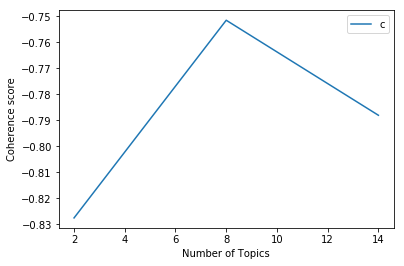

In [0]:
# Calculate and plot optimal number of topics - coherence score
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_censored, corpus=censoredmm, 
                                                        texts=cenTokens, start=2, limit=15, step=6)
plt.plot(range(2, 15, 6), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

 Coherency score said 8 

In [0]:
# LDA Topic modelling
censored_ldamodel = models.ldamodel.LdaModel(corpus=censoredmm, id2word=dictionary_censored, num_topics=8, 
                                         alpha='auto', eta='auto')



In [0]:
censored_ldamodel.save('censored.model')

In [0]:
censored_ldamodel = models.ldamodel.LdaModel.load('censored.model')

In [0]:
# show topics
censored_topics = censored_ldamodel.print_topics(num_words=20)

# Printing topics in hip hop df
for topic in censored_topics:
    print(topic)

(0, '0.005*"say" + 0.005*"trump" + 0.004*"time" + 0.004*"u.s" + 0.004*"report" + 0.003*"government" + 0.003*"facebook" + 0.003*"israel" + 0.003*"election" + 0.003*"include" + 0.003*"iran" + 0.003*"like" + 0.003*"state" + 0.003*"new" + 0.002*"israeli" + 0.002*"people" + 0.002*"year" + 0.002*"support" + 0.002*"group" + 0.002*"campaign"')
(1, '0.006*"trump" + 0.005*"say" + 0.004*"country" + 0.004*"people" + 0.004*"report" + 0.003*"time" + 0.003*"state" + 0.003*"russia" + 0.003*"u.s" + 0.003*"israel" + 0.003*"government" + 0.003*"like" + 0.003*"year" + 0.002*"election" + 0.002*"syria" + 0.002*"know" + 0.002*"iran" + 0.002*"include" + 0.002*"president" + 0.002*"world"')
(2, '0.006*"trump" + 0.005*"say" + 0.005*"time" + 0.004*"government" + 0.004*"people" + 0.004*"report" + 0.004*"year" + 0.004*"state" + 0.004*"u.s" + 0.003*"country" + 0.003*"like" + 0.003*"russia" + 0.003*"media" + 0.003*"president" + 0.002*"support" + 0.002*"come" + 0.002*"iran" + 0.002*"syria" + 0.002*"include" + 0.002*"w

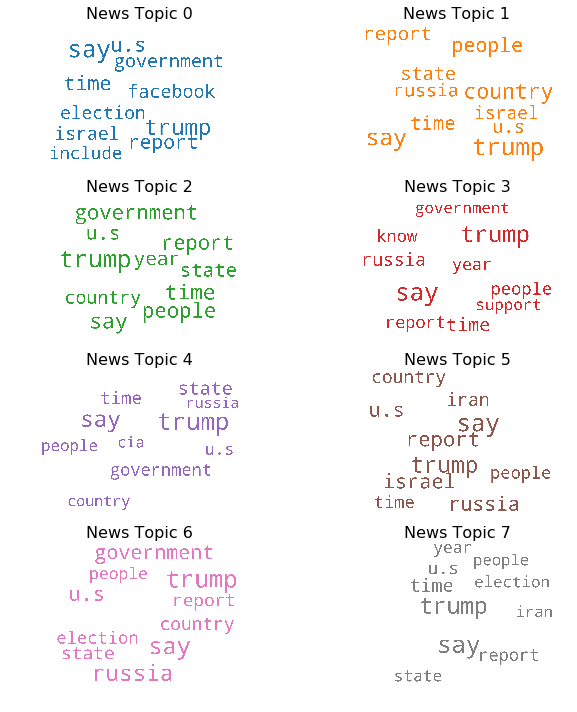

In [0]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = censored_ldamodel.show_topics(formatted=False)


fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [0]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(censored_ldamodel, censoredmm, dictionary=dictionary_censored)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.003978 -0.001597       1        1  30.351910
6     -0.007362  0.001833       2        1  15.236062
5      0.003442  0.011937       3        1  12.159997
4     -0.001252  0.001346       4        1  10.299844
1     -0.003138  0.001203       5        1   9.529902
0      0.009240 -0.004025       6        1   9.369729
3     -0.004033 -0.007599       7        1   7.961981
7      0.007081 -0.003098       8        1   5.090575, topic_info=     Category         Freq          Term        Total  loglift  logprob
137   Default  1915.000000           say  1915.000000  30.0000  30.0000
165   Default  2035.000000         trump  2035.000000  29.0000  29.0000
79    Default   846.000000        israel   846.000000  28.0000  28.0000
2462  Default  1124.000000        russia  1124.000000  27.0000  27.0000
78    Default   776.000000          iran   776.000000  26.0000  26.0000
162   Default  1238.000000          time  1238.000000  25.0000  25.0000
179   Default   895.000000          year   895.000000  24.0000  24.0000
134   Default  1207.000000        report  1207.000000  23.0000  23.0000
690   Default   786.000000      election   786.000000  22.0000  22.0000
299   Default   665.000000          know   665.000000  21.0000  21.0000
1270  Default  1210.000000           u.s  1210.000000  20.0000  20.0000
257   Default   322.000000      facebook   322.000000  19.0000  19.0000
31    Default  1055.000000       country  1055.000000  18.0000  18.0000
149   Default  1100.000000         state  1100.000000  17.0000  17.0000
220   Default   685.000000          come   685.000000  16.0000  16.0000
392   Default   700.000000       support   700.000000  15.0000  15.0000
106   Default   633.000000           new   633.000000  14.0000  14.0000
119   Default  1135.000000        people  1135.000000  13.0000  13.0000
1671  Default   529.000000       russian   529.000000  12.0000  12.0000
1506  Default   304.000000         china   304.000000  11.0000  11.0000
81    Default   368.000000       israeli   368.000000  10.0000  10.0000
280   Default   710.000000       include   710.000000   9.0000   9.0000
63    Default   513.000000            go   513.000000   8.0000   8.0000
35    Default   543.000000           day   543.000000   7.0000   7.0000
1039  Default   552.000000     political   552.000000   6.0000   6.0000
1334  Default   585.000000         world   585.000000   5.0000   5.0000
2292  Default   511.000000           cia   511.000000   4.0000   4.0000
269   Default  1167.000000    government  1167.000000   3.0000   3.0000
271   Default   522.000000         group   522.000000   2.0000   2.0000
1305  Default   381.000000          vote   381.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
179    Topic8    48.444595          year   895.168579   0.0612  -5.8238
1357   Topic8    14.703365         break   172.380875   0.5161  -7.0161
1010   Topic8    24.039833         party   346.365875   0.3100  -6.5245
35     Topic8    32.772533           day   543.020874   0.1702  -6.2146
89     Topic8    19.549715           law   262.328613   0.3811  -6.7313
392    Topic8    38.455406       support   700.758484   0.0751  -6.0547
1334   Topic8    33.841038         world   585.801636   0.1265  -6.1825
373    Topic8    22.418526  saudi_arabia   322.632324   0.3112  -6.5943
548    Topic8    19.734888        change   271.727356   0.3554  -6.7218
1270   Topic8    54.239723           u.s  1210.902832  -0.1279  -5.7108
134    Topic8    53.302006        report  1207.624756  -0.1427  -5.7282
149    Topic8    48.505859         state  1100.361328  -0.1439  -5.8225
253    Topic8    22.798569      evidence   343.143311   0.2663  -6.5775
79     Topic8    39.044895        israel   846.791443  -0.0990  -6.0395
299    Topic8    33.627365          know   665.376526  -0.0072  -6.1889
226    Topic8    29.378119      c

In [0]:
#fill topic weights by videos
def fill_topic_weights(df_row, bow_corpus):
    try:
        for i in censored_ldamodel[bow_corpus[df_row.name]]:
            df_row[str(i[0])] = i[1]
    except:
        return df_row
    return df_row


In [0]:
censored_df = censored_df.apply(fill_topic_weights, axis=1, args=[bow_corpus_censored]).fillna(0)


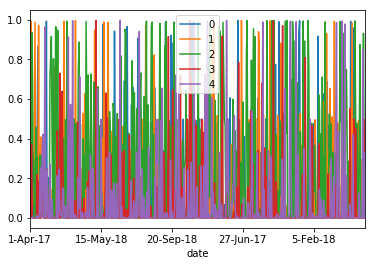

In [0]:
#plot
censored_df[['0','1','2','3','4','date']].groupby('date').mean().plot()


In [0]:
import dill

dill.dump_session('test.db')

In [0]:
dill.load_session('test.db')

## Updated Col-locations
- Election
- Meddling
- Interference
- Israel
- Russia Today
- “Citizen united”




### news

In [0]:
newsIndex = nltk.text.ConcordanceIndex(newsText) 

newsIndex.print_concordance('election')

Displaying 25 of 25 matches:
arge single vote bloc state primary election week away remind change vote rule i
chool board stop short set new bond election hear result public survey week show
fee president clinton backtrack pre election promise reader inspire write mr pre
itution dictate government day hold election lawmaker fail parliament dissolve a
menian voter chance replace general election appear crowd back pashinyan disappo
 spit go tolerate baker attend post election rally pashinyan tell associate pres
ory say tuesday decide send special election federal court refer time try fail b
d little rock resident want special election vote away large seat petition carpe
ead propose city board vote special election question public display total comme
 have see city board council likely election outstanding service incumbent littl
esentation change geo district lead election outstanding mayor council member ti
toy throw long ago speak large seat election year ago adcock pseudo challenger w

In [0]:
newsIndex.print_concordance('meddling')

no matches


In [0]:
newsIndex.print_concordance('interference')

Displaying 25 of 25 matches:
or mueller probe russian election interference possible coordination trump assoc
elate allegation russian election interference possible coordination trump assoc
or mueller probe russian election interference possible coordination trump assoc
yer reflection fraternity outside interference help facilitate kind prudent deci
or mueller probe russian election interference possible coordination trump assoc
or mueller probe russian election interference possible coordination trump assoc
omatic relation follow policy non interference internal affair add moroccan fore
or mueller probe russian election interference possible coordination trump assoc
elate allegation russian election interference possible coordination trump assoc
position party say accusation u.s interference concerted effort close democratic
ial counsel investigation russian interference election facebook announce change
rt s. mueller iii russia election interference federal law enforcement official 

In [0]:
newsIndex.print_concordance('israel')

Displaying 25 of 25 matches:
 adopt resolution freeze recognition israel condition israel recognize state pal
 freeze recognition israel condition israel recognize state palestine source clo
lution current gather hold agreement israel abbas reportedly announce measure sp
e gather week ramallah numb decision israel thing council allow file war crime c
 accord palestinians agree recognize israel pa responsible govern palestinians w
nc usually adopt pa addition measure israel pnc end money transfer gaza strip ha
rove year old jewish connection land israel false abbas speak length fail peace 
ation recognition december jerusalem israel capital decision embassy mid 82-year
ep near future relationship neighbor israel say important far reach late week pa
year ago sign agree term accept time israel term use privacy policy agree receiv
ree receive late news amp offer time israel partner ad sponsor course ready tues
able remark concern origin holocaust israel legitimacy rhetoric play hand want s

In [0]:
newsIndex.print_concordance('citizen')

Displaying 25 of 25 matches:
e newspaper archive franklin county citizen preston citizen year ago april majo
ive franklin county citizen preston citizen year ago april majority favor new m
change ideological allegiance speak citizen moral centerpiece documentary show 
iew picture truly understand happen citizen need detail detail zone code co pre
 short tutorial development process citizen involve encourage people look white
 lot madrid airport kill ecuadorian citizen french police officer jean serge ne
azi unit duress oberlander canadian citizen unit speak russian german act inter
achusetts toll opponent argue state citizen tax create challenge pass year bill
-130 hercules rescue resupplied u.s citizen year hurricane crash highway georgi
state party decision north carolina citizen downtown raleigh office cambridge a
nth north korean captivity american citizen remain captive pyongyang usa today 
korea large nuclear blast date sept citizen capital line street wave pink purpl
 korea show

In [0]:
newsIndex.print_concordance('rt')

Displaying 25 of 25 matches:
p elect role russian satellite network rt russian troll farm st petersburg promu
bliku weekly discussion digital divide rt flagship debate crosstalk press tv fla
sia tasnim news agency global research rt op edge global village space feb presi
sider moderate try iraqi alliance tell rt add doubt al abadi secure victory rawl
ze liberal upset platform relationship rt russian state own television network u
sion network u.s presidential election rt u.s intelligence call kremlin principa
 $ twitter year say regret association rt ban network account advertise conserva
l tweet gidley word shortly utter fact rt tweet different version statement minu
arren mccaffrey donegal similar report rt s east cork look like result constitue
sligo leitrim donegal observer predict rt report cork county return officer clos
te current situation bad good reminder rt thing //t.co zbm4i0wouf correction lin
on silverstein tweet bad good reminder rt thing distract w family weekend new yo

E2E, End-to-end auditable voting systems, propaganda, cfr, ratfcking, iannarelli, annexation, mccarthyite

In [0]:
newsIndex.print_concordance('propaganda')

Displaying 25 of 25 matches:
sider yellow journalism hearst era propaganda pamphlet world war ii.but rise int
n pump fist air chant defend carry propaganda slogan mass rally day struggle u.s
 pass outer wall construction site propaganda billboard depict launch north kore
 past outer wall construction site propaganda billboard depict launch north kore
north korean soldier pass roadside propaganda depict north korean soldier kill u
mprison north korea jail try steal propaganda sign hotel country release june fa
movie carry newton newton line art propaganda blur bright spot feel sort reducti
know german white book iiwas major propaganda coup washington postdescribed dipl
semble remark incident brush aside propaganda continue camouflage move german ch
event europe come undermine german propaganda advantage early invade defeat denm
 circulate document further german propaganda goal today recent rise state non s
information launder key successful propaganda campaign film secretly britain cha

In [0]:
newsIndex.print_concordance('cfr')

Displaying 25 of 25 matches:
nvestigation misuse official position cfr complaint painter acknowledge unclear
house counsel instruct employee abide cfr provide employee executive office pre
 branch wide standard ethical conduct cfr executive branch wide financial discl
 wide financial disclosure regulation cfr sentence footnote add employee white 
te house office agency employee refer cfr 2635.702(c define cfr 2635.1029(h off
 employee refer cfr 2635.702(c define cfr 2635.1029(h office white house counse
t employee white house office subject cfr operation crf okay let hack way legal
ion mean key regulation associate oge cfr cfr cfr cfr apply white house staff v
mean key regulation associate oge cfr cfr cfr cfr apply white house staff varie
 key regulation associate oge cfr cfr cfr cfr apply white house staff variety r
 regulation associate oge cfr cfr cfr cfr apply white house staff variety reaso
uery kellyanne conway authority embed cfr shaub ask white house conway statemen
ouse employ

In [0]:
newsIndex.print_concordance('ratfcking')

Displaying 9 of 9 matches:
tion justice investigation russian ratfcking piece consideration mueller fully 
y completely grab like legislative ratfcking wisconsin self inflict inch close 
ict inch close possibility russian ratfcking involve hack election system specu
 joy reid red bait mention russian ratfcking help decide presidential election 
bert mueller investigation russian ratfcking presidential election end wrong de
ion seriously wrong affair russian ratfcking dirty money clean family president
tline thoroughly complete campaign ratfcking aim exclusively elect donald trump
playbook infamous hand ad ratfcker ratfcking helm campaign send postcard africa
onald trump learn bill clinton lie ratfcking community learn easily elite polit


In [0]:
newsIndex.print_concordance('iannarelli')

Displaying 7 of 7 matches:
lligence investigation accord john iannarelli fbi special agent national spokesp
emocrat indicate fbi inappropriate iannarelli say russia investigation allegatio
e campaign outside campaign office iannarelli say important distinction wedick o
tion russian intelligence campaign iannarelli suggest process apply political ca
t process apply political campaign iannarelli say look foreign state activity tr
etermine well interest country fbi iannarelli say administrator work corruption 
reason people question effectively iannarelli go demonstrate power public follow


In [0]:
newsIndex.print_concordance('annexation')

Displaying 25 of 25 matches:
a sentimental putin russia illegal annexation crimea military destabilization uk
 internationally march sign region annexation redraw russia border spark wrong s
ine painful sanction impose russia annexation crimea involvement eastern ukraine
one wall street shannon domination annexation brainwash reproduction ideology st
ear rabbi meir kach party advocate annexation judea samaria gaza israel transfer
example heavily engage smooth bump annexation process chapman neighborhood wahl 
f late today labor mk walk support annexation citizenship palestinians dramatic 
cern region security follow russia annexation eastern ukraine step see hostile d
f late today labor mk walk support annexation citizenship palestinians dramatic 
cern region security follow russia annexation eastern ukraine step see hostile d
l situation new normal linkevicius annexation crimea event eastern ukraine donet
n kremlin series hostile act range annexation crimea moscow involvement syria co

In [0]:
newsIndex.print_concordance('mccarthyite')

Displaying 14 of 14 matches:
e silence people thing like smack mccarthyite tactic absolutely deplorable end 
ld ben norton denounce post piece mccarthyite smear detection isolation state s
sense decency session victim type mccarthyite character assassination leave con
israel capital enemy america hint mccarthyite purge federal employee deem fail 
israel capital enemy america hint mccarthyite purge federal employee deem fail 
fall democrat choose focus attack mccarthyite style witch hunt russia anti comm
gnificant leave mobilize directly mccarthyite campaign russia figure krugman ea
dviser michael flynn russia today mccarthyite ask trump speak warmth russian au
far patriarchy hysterical war cry mccarthyite feminist determine hunt man guilt
gendum clearly spell website deny mccarthyite intention group openly attempt co
 blame rig election insider latch mccarthyite campaign call government investig
erg washington post classic piece mccarthyite red bait propaganda complete fbi 
l time colu

### censored

In [0]:
censoredIndex = nltk.text.ConcordanceIndex(censoredText) 

censoredIndex.print_concordance('election')

Displaying 25 of 25 matches:
trip essence brazilian presidential election represent direct clash democracy ea
trip essence brazilian presidential election represent direct clash democracy ea
ht candidate win round presidential election sunday vote percent total shy major
rd evidence smoke gun poll lula win election hand coup plotter manage imprison p
my bot disgorge avalanche fake news election day specter haunt europe steve bann
ion aim turn european parliamentary election upside european parliament strasbou
theast like cambridge analytica u.s election bolsonaro campaign target undecided
 salvini define european parliament election chance europe italian foreign minis
eign minister enzo moavero see real election future europe bannon see future eur
n salvini le pen orban convince win election eu transform union european nation 
ro trumpism apparent minute message election day brazil great trump trumpism bol
 ms haley tell cbs think hear prior election think woman feel violate feel mistr

In [0]:
censoredIndex.print_concordance('meddling')

no matches


In [0]:
censoredIndex.print_concordance('interference')

Displaying 25 of 25 matches:
r lot russia lot china deep state interference myopic focus shift kevin warsh fr
 company operate china regulation interference target contrary international law
ina trade practice mention russia interference syria war suspect meddle election
in name indict connection russian interference election official say early thurs
ad criminal investigation russian interference election possible cooperation tru
gn continue turn evidence israeli interference u.s political system continue sur
nately spite evidence possibility interference subject congressional investigati
intpress news report typo russian interference american politic totally welcome 
s pass magnitsky act type russian interference intend influence policy go unnoti
op way current russian government interference country politic principle natural
t will unite state contrast favor interference country principle seek unipolar w
 change u.s policy maker practice interference day perfectly will allow russians

In [0]:
censoredIndex.print_concordance('israel')

Displaying 25 of 25 matches:
 israel want entire middle east look like go
 israel relation strong speak award ceremony
ty america washington dc pompeo hail israel democratic prosperous add desire pea
my arutz sheva report pompeo compare israel iran cite corrupt leader assault hum
rack obama respect leader iran state israel stress president trump leadership un
 leadership unite state stand firmly israel pompeo discuss long await peace init
nd thing material opportunity people israel accord jerusalem post pompeo add wan
e israeli prison country pressure pa israel enact law withhold $ month tax reven
a cease stipend australia cut aid pa israel tie historically strong president do
ch new height week large aid package israel worth $ year enter force memorandum 
ter force memorandum understand sign israel obama administration state departmen
trump administration american people israel security trump spearhead call deal c
ive hope solve decade long situation israel palestine month president e

In [0]:
censoredIndex.print_concordance('citizen')

Displaying 25 of 25 matches:
rica europe sure populist idea hear citizen europe perceive europe democracy an
alist turkish official stress saudi citizen consulate authority istanbul contac
est rich powerful interest majority citizen presence power oligarchy new notabl
ew york say cross ally partner harm citizen continue lie cheat deceive yes hell
llah tehran cross ally partner harm citizen continue lie cheat deceive yes hell
mily privacy right british european citizen assertion ultimately include reject
striction surveillance member state citizen violation charter ars technica summ
rvice element civil society million citizen force regime flee abroad say share 
ecision alliance justice afj public citizen demonstrate corporation uber alles 
onsumer corporation turn government citizen corporate criminal bail taxpayer fo
y healthcare case come court public citizen factually base report judge kavanau
on collect intelligence unite state citizen openly authorize follower work prim
allow indef

In [0]:
censoredIndex.print_concordance('rt')

Displaying 25 of 25 matches:
dier leave syria past day russia today rt report today ceremony honour russian m
cow banquet honor russian media outlet rt merely table putin happen sit maybe mi
bertrand jill stein tell @cnn presence rt gala moscow dec controversial time oba
 report state russian own media outlet rt sputnik blame land donald trump white 
key disclose payment russian news site rt describe unclassified u.s intelligence
batter mrs clinton russian outlet like rt sputnik far splashy far difficult trac
opaganda obvious point americans watch rt and/or sputnik shane offer detail alle
 report typo antimedia op ed interview rt syrian president bashar al assad utter
 money obstacle line relative pittance rt pay gen michael flynn speak tv network
flynn relatively modest speak fee turn rt negotiate flynn rate downward fact was
lynn russia connect payment post write rt balk pay flynn original ask price sorr
h exceed budget moment alina mikhaleva rt head market write flynn associate mont

E2E, End-to-end auditable voting systems, propaganda, cfr, ratfcking, iannarelli, annexation, mccarthyite

In [0]:
censoredIndex.print_concordance('propaganda')

Displaying 25 of 25 matches:
s 9/19/18 combat fake news partner propaganda organization found fund government
ork heroic place copy publish book propaganda blitz journalism school service co
ill give power gps pass pure state propaganda strike similarity bbc coverage pri
tiality consideration tell chapter propaganda blitz describe smear campaign moun
leni riefenstahl hitler film maker propaganda mesmerize german public tell messa
iberal educate bourgeoisie ask say propaganda win allow john pilger australian b
ia pundit supposedly allow russian propaganda account operate ahead election sus
reign interference nefarious state propaganda kicker reuters write dfr lab fund 
ok page possible foreign influence propaganda disturbingly outside geopolitical 
 congress legalize government fund propaganda democrat currently look regulate s
hyct august acceptable outlet spew propaganda bipartisan priority like war party
whirlwind media tour help imperial propaganda machine manufacture support late r

In [0]:
censoredIndex.print_concordance('cfr')

Displaying 3 of 3 matches:
e chief propagandist job stengel tell cfr audience talk propaganda be propagand
n leader illegal bomb campaign expect cfr alum bolton notorious russophobe rhet
nk uneasy bolton share view colleague cfr allege russian interference president


In [0]:
censoredIndex.print_concordance('ratfcking')

no matches


In [0]:
censoredIndex.print_concordance('iannarelli')

no matches


In [0]:
censoredIndex.print_concordance('annexation')

Displaying 12 of 12 matches:
secretary state mike pompeo moscow annexation crimea chinese military expert cit
pation west bank gaza golan height annexation jerusalem protest erupt creative c
 samaria course illegal occupation annexation predate trump israel 70-year occup
tion interest face end game formal annexation west bank israel trump encourage n
ate finally trump netanyahu formal annexation west bank america object previousl
n collusion election meddle russia annexation crimea difference prevent country 
bd movement separate bill pave way annexation west bank approve yesterday israel
normalise occupation advance creep annexation west bank high court justice treat
 israel despite israeli occupation annexation collective punishment palestinian 
n social movement novorossiya call annexation crimea ukraine territory frighten 
ial include trump criticize russia annexation crimea subsequent violence ukraine
rade contact russian minister time annexation crimea washington interest europe 

In [0]:
censoredIndex.print_concordance('mccarthyite')

Displaying 2 of 2 matches:
stion solon send beeley read like mccarthyite charge sheet invite north korea m
te arm spend proxy conflict globe mccarthyite intolerance dissent calm voice re


## Checking sources again

In [0]:
news_df_source = list(set(news_df['source']))

In [0]:
news_df_source.sort()

In [0]:
news_sources = pandas.DataFrame(news_df_source)

In [0]:
news_sources.to_csv('sources.csv')

Eurasia Review
Al Jazeera America
Al-Arabiya
Al-Bawaba
Al-Monitor

## Topic Model Comparison


In [0]:
def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)


try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

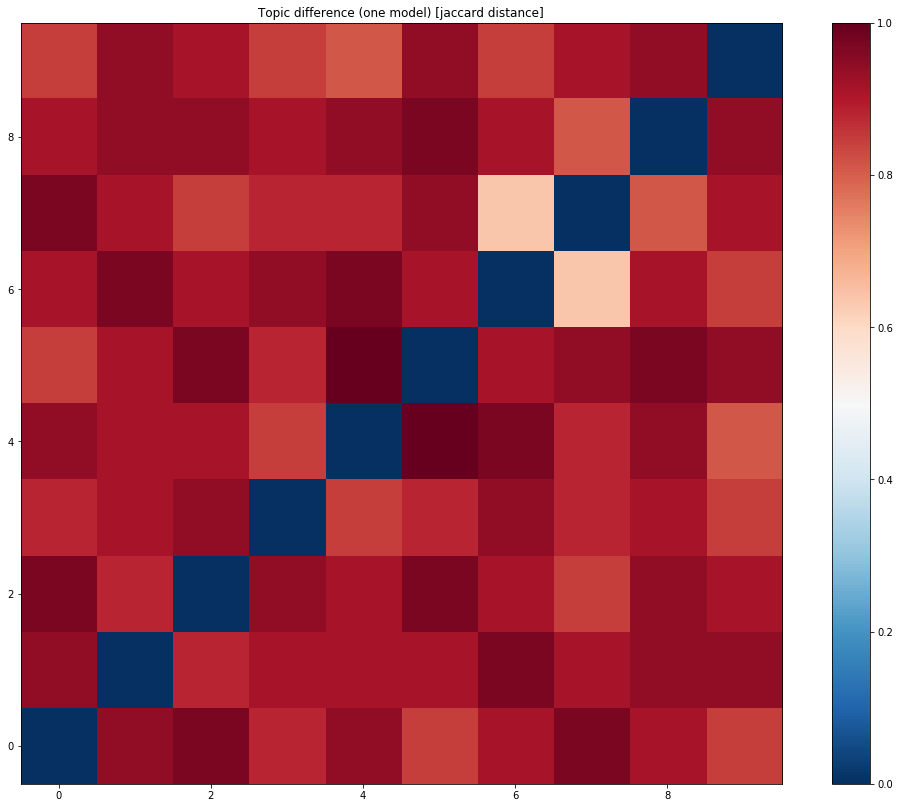

In [0]:
# News model - 10 topics
mdiff, annotation = news_ldamodel.diff(news_ldamodel, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

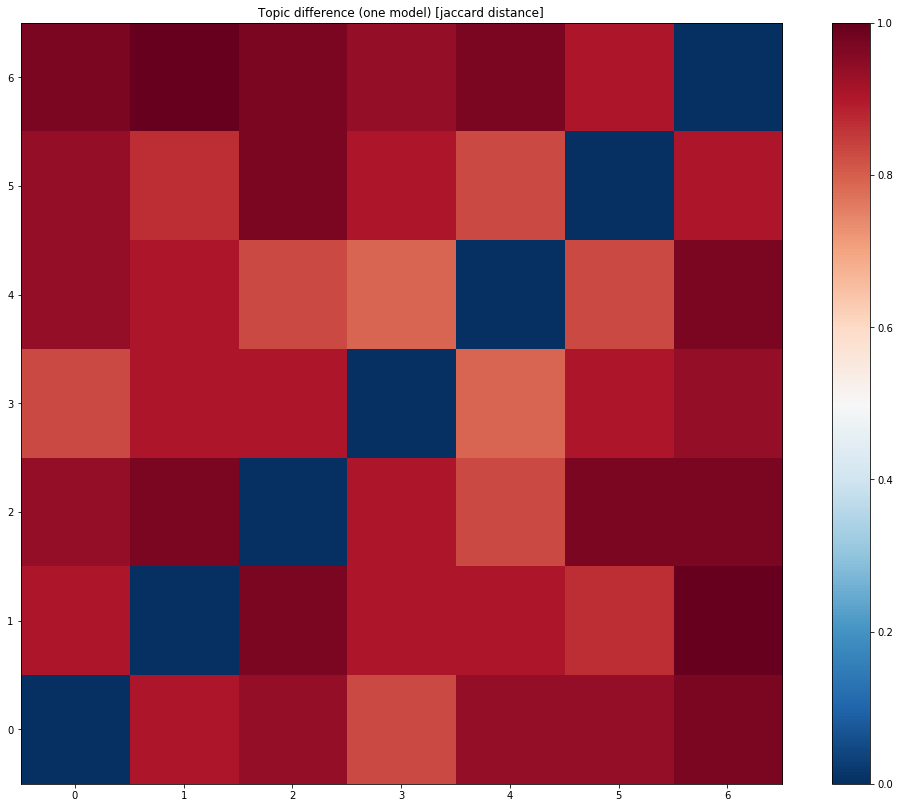

In [0]:
# new model - 7 topics
mdiff, annotation = news_ldamodel_7.diff(news_ldamodel_7, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

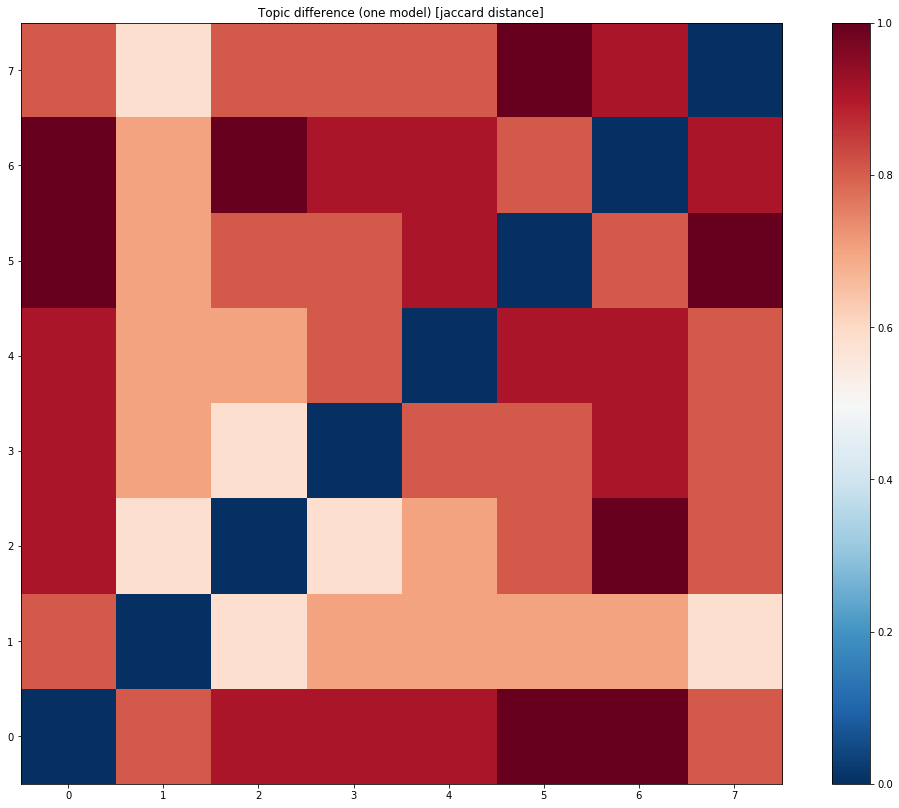

In [0]:
mdiff, annotation = censored_ldamodel.diff(censored_ldamodel, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

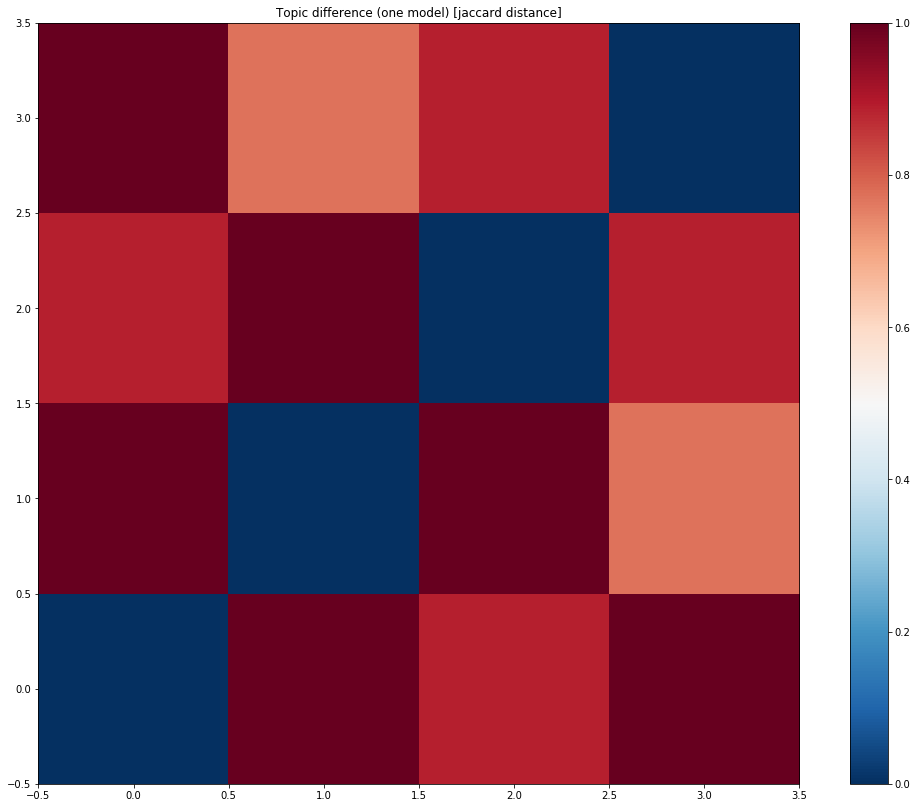

In [0]:
mdiff, annotation = censored_ldamodel_4.diff(censored_ldamodel_4, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

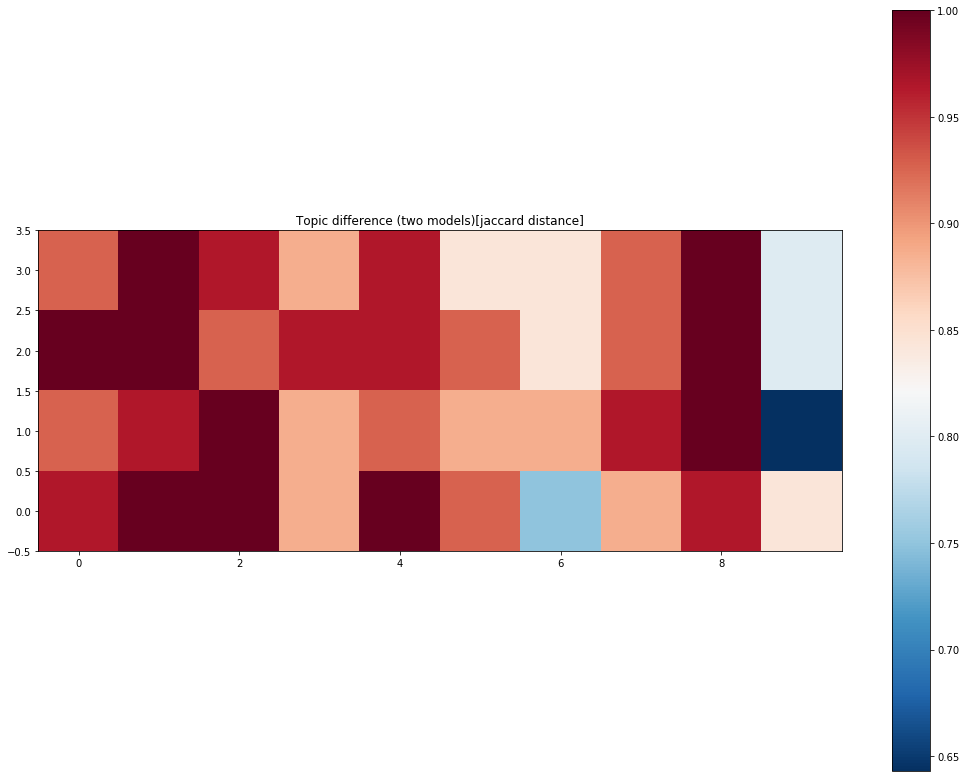

In [0]:
mdiff, annotation = news_ldamodel.diff(censored_ldamodel_4, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)

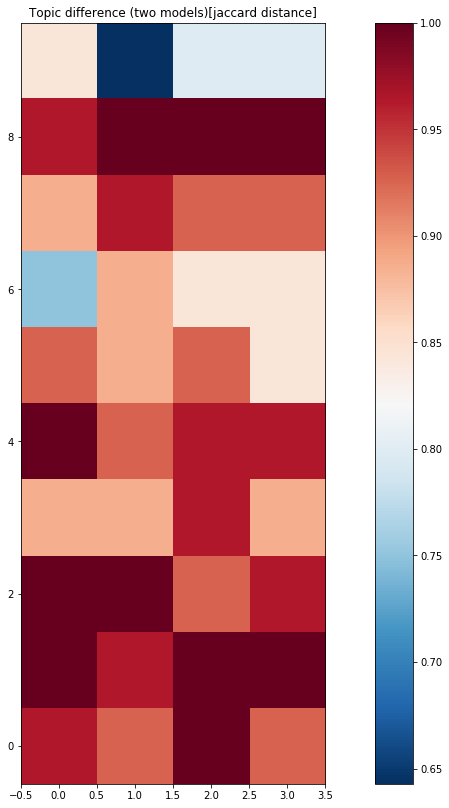

In [0]:
mdiff, annotation = news_ldamodel.diff(censored_ldamodel_4, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)

# Updated censored df

In [0]:
censoredDF = pickle.load( open( "censored_df_new.pkl", "rb" ) )

In [0]:
censoredDF.shape

(790, 7)

In [0]:
#list for conspiracy token analysis
censoredText_tokens = []
for i in censoredDF['tokens']:
    for x in i:
        censoredText_tokens.append(x)

# create text
censoredText = nltk.Text(censoredText_tokens) 

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


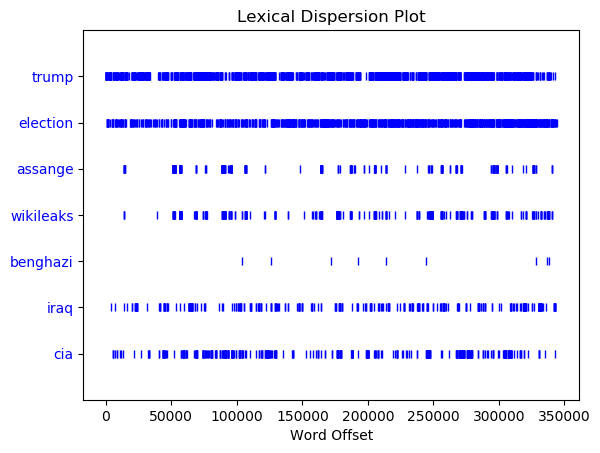

In [0]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
censoredText.dispersion_plot(['trump','election', 'assange', 'wikileaks' ,'benghazi', 'iraq', 'cia'])
sns.set() #Re-enabling seaborn|

In [0]:
censoredIndex = nltk.text.ConcordanceIndex(censoredText) 

censoredIndex.print_concordance('election')

Displaying 25 of 25 matches:
trip essence brazilian presidential election represent direct clash democracy ea
trip essence brazilian presidential election represent direct clash democracy ea
ht candidate win round presidential election sunday vote percent total shy major
rd evidence smoke gun poll lula win election hand coup plotter manage imprison p
 follow army bot disgorge avalanche election day specter haunt europe steve bann
ion aim turn european parliamentary election upside european parliament strasbou
 southeast like cambridge analytica election bolsonaro campaign target undecided
 salvini define european parliament election chance europe italian foreign minis
eign minister enzo moavero see real election future europe bannon see future eur
n salvini le pen orban convince win election eu transform union european nation 
ro trumpism apparent minute message election day brazil great trump trumpism bol
 ms haley tell cbs think hear prior election think woman feel violate feel mistr

In [0]:

censoredIndex.print_concordance('russia')

Displaying 25 of 25 matches:
mper election mimick allegation levy russia nearly year prior speech trump claim
undermine republicans president warn russia china russia media largely shrug pro
ublicans president warn russia china russia media largely shrug proclamation pre
succeed shift prevail narrative away russia china penny expect state thursday sp
g probably wo change expect hear lot russia lot china deep state interference my
r power britain china france germany russia unite state tehran agree limit nucle
ers aug france britain germany china russia stay pact vow save despite restorati
revious de escalation zone negotiate russia turkey iran collapse party unable ex
lti facet geopolitical tension syria russia iran anxious defy washington long ru
mp attempt isolate taiwan deepen tie russia counterbalance accelerate military b
iticize china trade practice mention russia interference syria war suspect meddl
ease sanction france britain germany russia china european union accord iran foe

In [0]:
censoredIndex.print_concordance('israel')

Displaying 25 of 25 matches:
 israel want entire middle east look like go
 israel relation strong speak award ceremony
ty america washington dc pompeo hail israel democratic prosperous add desire pea
my arutz sheva report pompeo compare israel iran cite corrupt leader assault hum
rack obama respect leader iran state israel stress president trump leadership un
 leadership unite state stand firmly israel pompeo discuss long await peace init
nd thing material opportunity people israel accord jerusalem post pompeo add wan
e israeli prison country pressure pa israel enact law withhold month tax revenue
a cease stipend australia cut aid pa israel tie historically strong president ad
ch new height week large aid package israel worth year enter force memorandum un
ter force memorandum understand sign israel obama administration state departmen
trump administration american people israel security trump spearhead call deal c
ive hope solve decade long situation israel palestine month president e

In [0]:
censoredIndex.print_concordance('interference')

Displaying 25 of 25 matches:
r lot russia lot china deep state interference myopic focus shift kevin warsh fr
 company operate china regulation interference target contrary international law
ina trade practice mention russia interference syria war suspect meddle election
in name indict connection russian interference election official say early thurs
ad criminal investigation russian interference election possible cooperation tru
gn continue turn evidence israeli interference political system continue surface
nately spite evidence possibility interference subject congressional investigati
intpress news report typo russian interference american politic totally welcome 
s pass magnitsky act type russian interference intend influence policy go unnoti
op way current russian government interference country politic principle natural
t will unite state contrast favor interference country principle seek unipolar w
 try change policy maker practice interference day perfectly will allow russians

# Topic modeling with updated censor df

In [0]:
censoredDF.columns

Index(['link', 'date', 'headline', 'source', 'text', 'tokens',
       'normalized_tokens'],
      dtype='object')

In [0]:
from gensim import corpora, models

In [0]:
cenTokens = censoredDF['tokens']

# Build bigram and trigram models after get_lemmas to see if there's anything relevant
cen_bigram = models.Phrases(cenTokens, min_count=5)

# export trained model to use less memory:
censored_bigram_mod = models.phrases.Phraser(cen_bigram)


# turning into bigrams
def make_bigrams(texts):
    return [censored_bigram_mod[doc] for doc in texts]

# make bigrams
cenTokens = make_bigrams(cenTokens)

In [0]:
#create dict
dictionary_censored = corpora.Dictionary([i for i in cenTokens])

In [0]:
# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
bow_corpus_censored = [dictionary_censored.doc2bow(text) for text in cenTokens]

gensim.corpora.MmCorpus.serialize('censored.mm', bow_corpus_censored)
censoredmm = corpora.MmCorpus('censored.mm')

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=8)
        model_list.append(model)
        coherence_model = models.coherencemodel.CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

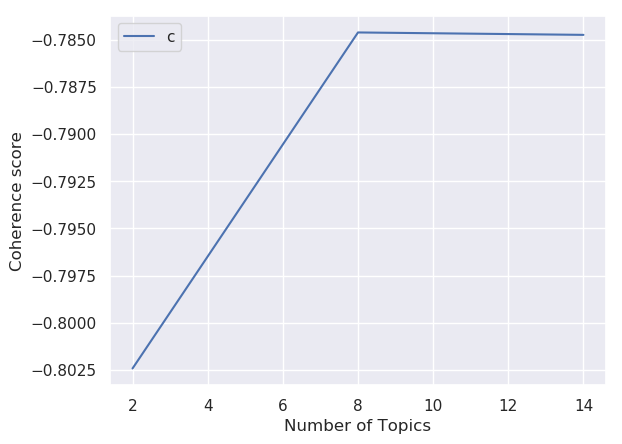

In [0]:
# Calculate and plot optimal number of topics - coherence score
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_censored, corpus=censoredmm, 
                                                        texts=cenTokens, start=2, limit=15, step=6)
plt.plot(range(2, 15, 6), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');


In [0]:
# LDA Topic modelling - 8 topics
censored_ldamodel = models.ldamodel.LdaModel(corpus=censoredmm, id2word=dictionary_censored, num_topics=8, 
                                         alpha='auto', eta='auto')

In [0]:
# save
censored_ldamodel.save('censored_new.model')

In [0]:
# load
censored_ldamodel = gensim.models.ldamodel.LdaModel.load('censored_new.model')

In [0]:
censoredmm = corpora.MmCorpus('censored.mm')

In [0]:
# LDA Topic modelling - 4 topics
censored_ldamodel_4 = models.ldamodel.LdaModel(corpus=censoredmm, id2word=dictionary_censored, num_topics=4, 
                                         alpha='auto', eta='auto')

In [0]:
censored_ldamodel_4.save('censored_ldamodel_4.model')

In [0]:
# show topics
censored_topics = censored_ldamodel.print_topics(num_words=20)

# Printing topics in hip hop df
for topic in censored_topics:
    print(topic)

(0, '0.007*"say" + 0.005*"time" + 0.004*"trump" + 0.004*"iran" + 0.004*"government" + 0.004*"year" + 0.004*"country" + 0.003*"people" + 0.003*"israel" + 0.003*"russia" + 0.003*"state" + 0.003*"support" + 0.003*"war" + 0.003*"report" + 0.003*"election" + 0.002*"syria" + 0.002*"accord" + 0.002*"know" + 0.002*"group" + 0.002*"cia"')
(1, '0.007*"trump" + 0.005*"say" + 0.004*"government" + 0.004*"time" + 0.004*"state" + 0.003*"like" + 0.003*"israel" + 0.003*"report" + 0.003*"people" + 0.003*"year" + 0.003*"media" + 0.003*"country" + 0.002*"attack" + 0.002*"election" + 0.002*"take" + 0.002*"russia" + 0.002*"new" + 0.002*"claim" + 0.002*"call" + 0.002*"support"')
(2, '0.007*"trump" + 0.005*"say" + 0.005*"government" + 0.004*"russia" + 0.004*"country" + 0.004*"report" + 0.004*"people" + 0.003*"state" + 0.003*"time" + 0.003*"israel" + 0.002*"like" + 0.002*"new" + 0.002*"unite_state" + 0.002*"support" + 0.002*"include" + 0.002*"attack" + 0.002*"media" + 0.002*"president" + 0.002*"know" + 0.002*"

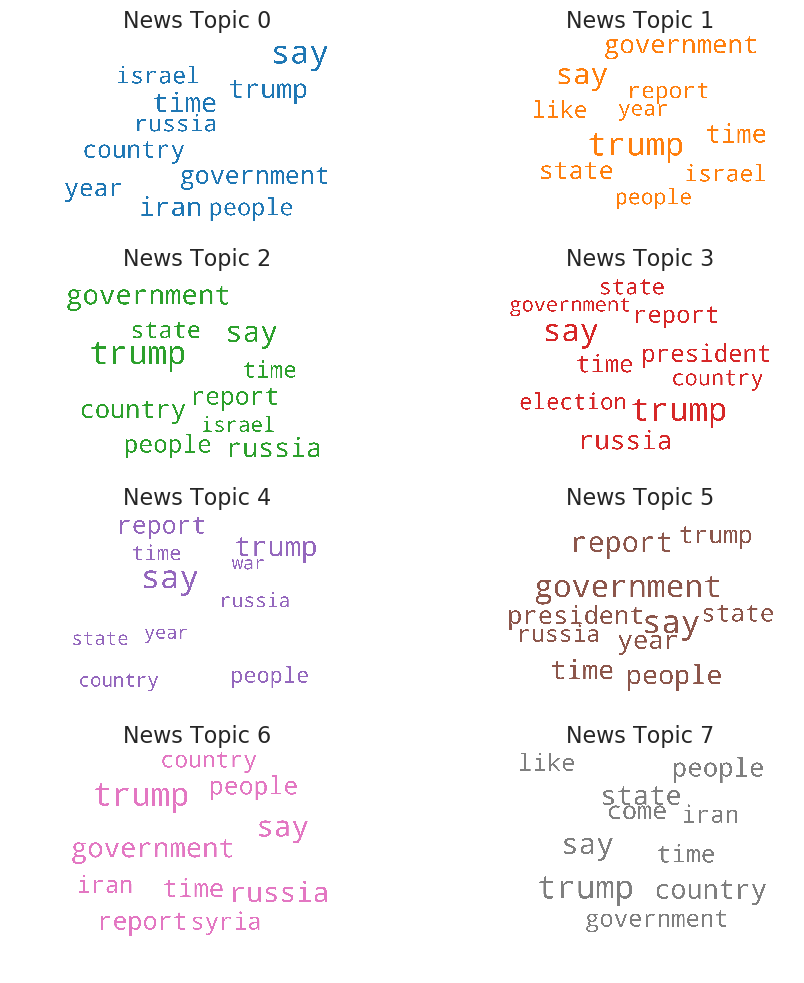

In [0]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = censored_ldamodel.show_topics(formatted=False)


fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [0]:
# LDA Topic modelling - 3 topics
censored_ldamodel_3 = models.ldamodel.LdaModel(corpus=censoredmm, id2word=dictionary_censored, num_topics=3, 
                                         alpha='auto', eta='auto')

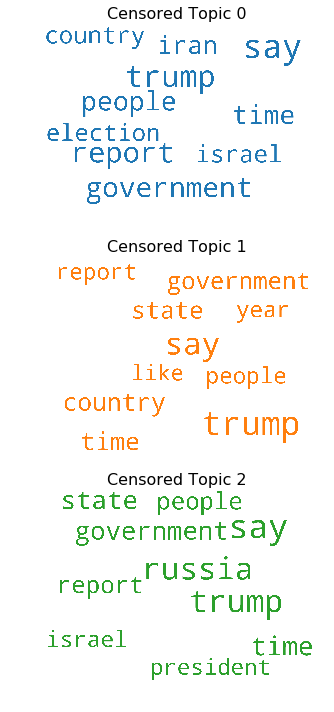

In [0]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = censored_ldamodel_3.show_topics(formatted=False)


fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Censored Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Distance

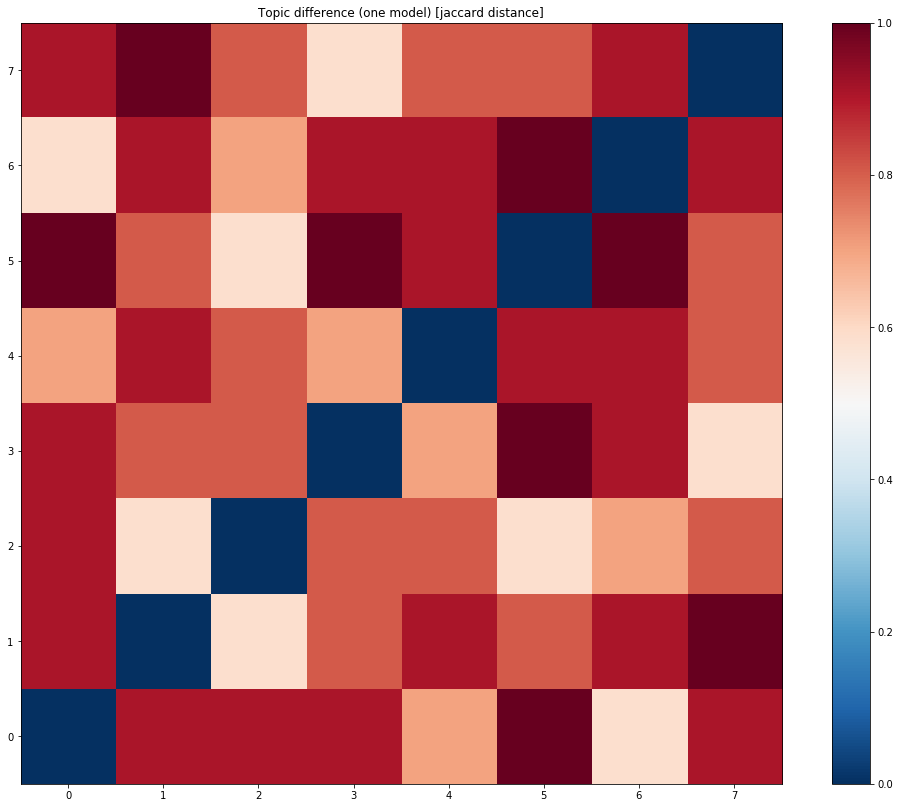

In [0]:
mdiff, annotation = censored_ldamodel.diff(censored_ldamodel, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

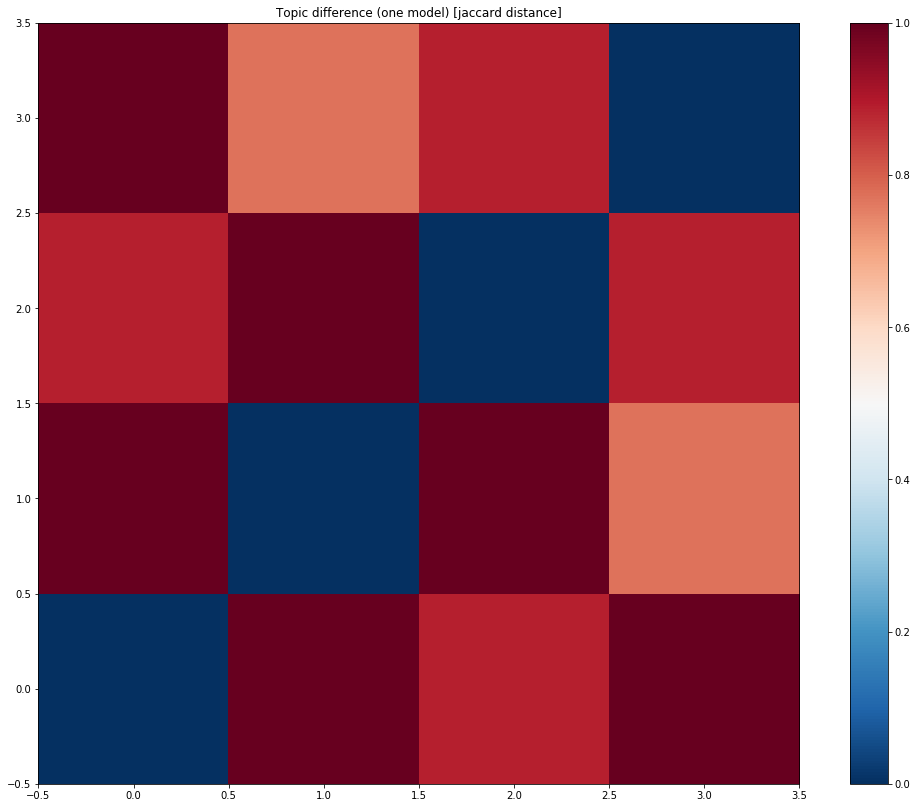

In [0]:
mdiff, annotation = censored_ldamodel_4.diff(censored_ldamodel_4, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

## Sources

In [0]:
set(censoredDF['source'])

{"('ACTIVISTPOST', 'http://www.activistpost.com/2017/06/exclusive-new-video-emerges-of-nodapl-provocateurs-setting-vehicles-on-fire.html')",
 "('AHT', 'https://ahtribune.com/us/israelgate/2447-israeli-spying-on-trump.html')",
 "('AHT', 'https://ahtribune.com/world/americas/2038-electoral-coup-honduras.html')",
 "('ANTIMEDIA', 'https://theantimedia.com/')",
 "('ANTIMEDIA', 'https://theantimedia.com/donald-trump-neocon/')",
 "('ANTIMEDIA', 'https://theantimedia.com/wikipedia-establishment-psyop/')",
 "('ANTIMEDIA', 'https://theantimedia.org')",
 "('ANTIMEDIA', 'https://theantimedia.org/')",
 "('ANTIMEDIA', 'https://www.theantimedia.org/')",
 "('ANTIMEDIA\\xa0', 'https://theantimedia.org/')",
 "('ANTIWAR', 'http://news.antiwar.com/2016/10/11/obama-mulls-retaliation-against-russia-over-claimed-hacks/')",
 "('ANTIWAR', 'http://news.antiwar.com/2016/10/27/putin-russia-is-not-going-to-attack-anyone/')",
 "('ANTIWAR', 'http://news.antiwar.com/2016/11/01/pentagon-seeks-another-6-billion-for-ove

In [0]:
news_df['source'].sample(n=40, random_state=1)


19200892              Chicago Tribune
25505899               New York Times
70014124                             
23478284                New York Post
18356415                    USA TODAY
16628828             The Detroit News
16571506             News-Medical.net
19187215          Gatestone Institute
24167924                    The Verge
16525414                Boston Herald
15871696                     The Hill
19207506                         CNBC
23751926               Times of Malta
15155480                    News Item
23013146                      Q13 FOX
70095767                 The Guardian
18955354                      Complex
21418262            Los Angeles Times
24742306                         NDTV
19697508                  Dallas News
15366984                New York Post
24390336                     euronews
70084296    Biddeford Journal Tribune
21606912                 FOX31 Denver
21853120                     ABC News
19794133                New York Post
18405618    

In [0]:
news_df['source'].sample(n=6, random_state=3)

15268069        WMUR Manchester
23017768           The Guardian
70046328       Fox News Insider
21806624         New York Times
21363128    Florida Times-Union
18447285      Los Angeles Times
Name: source, dtype: object

Updated Jaccard correlation

In [0]:
news_ldamodel = gensim.models.ldamodel.LdaModel.load('news.model')

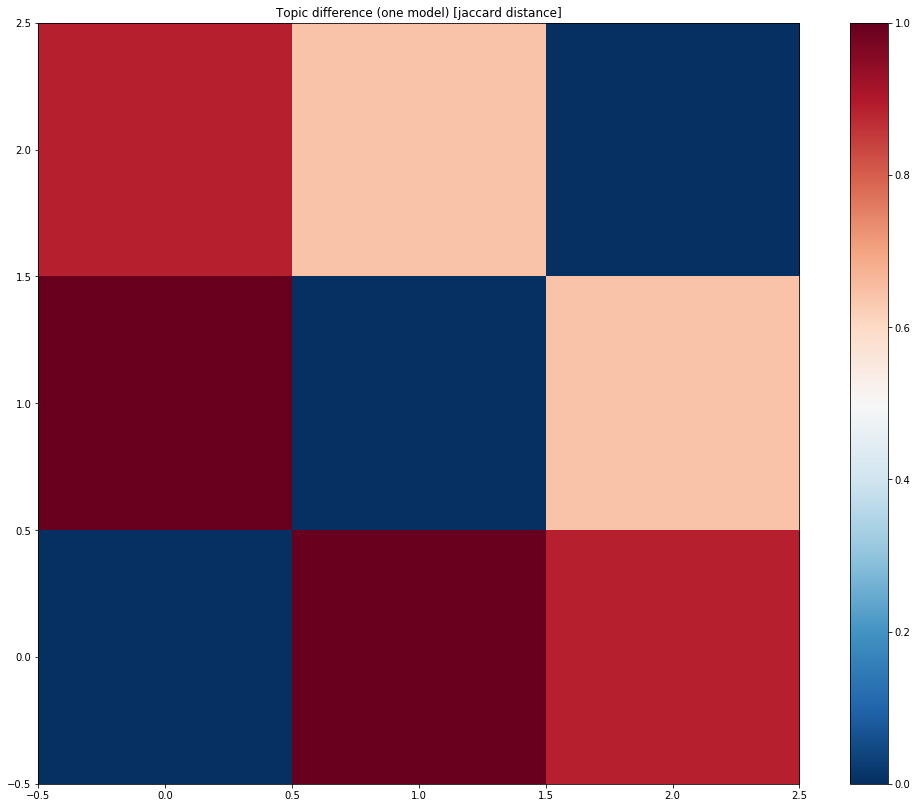

In [0]:


mdiff, annotation = censored_ldamodel_3.diff(censored_ldamodel_3, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

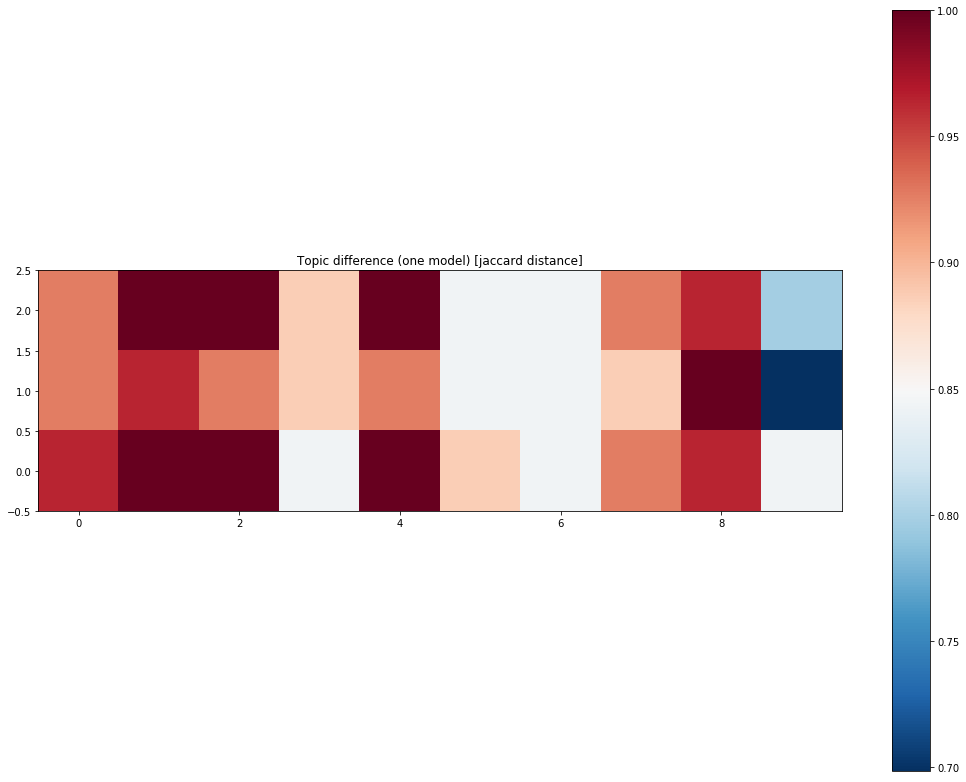

In [0]:


mdiff, annotation = censored_ldamodel_3.diff(news_ldamodel, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)